In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_csv('./Boston_house.csv')

In [3]:
df.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


### 단순선형회귀분석 : crim, rm, lstat

In [10]:
target1 = df[['Target']] # DataFrame
target2 = df['Target']   # Series

In [16]:
target = df['Target']
crim = df['CRIM']
rm = df['RM']
lstat = df['LSTAT']

In [17]:
crim1 = sm.add_constant(crim, has_constant='add')
model = sm.OLS(target, crim1).fit()

In [18]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           1.17e-19
Time:                        16:18:43   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.0

### y_hat = beta0 + beta1*X

In [21]:
np.dot(crim1, model.params)

array([ 24.03048217,  24.02176733,  24.02177563,  24.01966646,
        24.00443729,  24.02071274,  23.99644902,  23.97309042,
        23.94540138,  23.96250722,  23.93973403,  23.98433377,
        23.99416963,  23.77163594,  23.76823138,  23.77261995,
        23.59552468,  23.70751396,  23.69982879,  23.73176107,
        23.51337514,  23.67934745,  23.52139661,  23.62271965,
        23.72160552,  23.68412214,  23.75413567,  23.63627976,
        23.71216824,  23.61689868,  23.56360486,  23.4706396 ,
        23.45682622,  23.55492323,  23.36347899,  24.00646341,
        23.99265003,  23.99983283,  23.96042712,  24.02163447,
        24.01915993,  23.98019433,  23.97435675,  23.96694145,
        23.98216648,  23.96193426,  23.95490093,  23.9379155 ,
        23.92770182,  23.94185981,  23.99626634,  24.01509937,
        24.01085198,  24.01242555,  24.02745959,  24.02766303,
        24.02457401,  24.02716065,  23.96898004,  23.99022532,
        23.97110996,  23.96181385,  23.98732314,  23.98

In [22]:
pred = model.predict(crim1)

In [23]:
pred - np.dot(crim1, model.params)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
476    0.0
477    0.0
478    0.0
479    0.0
480    0.0
481    0.0
482    0.0
483    0.0
484    0.0
485    0.0
486    0.0
487    0.0
488    0.0
489    0.0
490    0.0
491    0.0
492    0.0
493    0.0
494    0.0
495    0.0
496    0.0
497    0.0
498    0.0
499    0.0
500    0.0
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Length: 506, dtype: float64

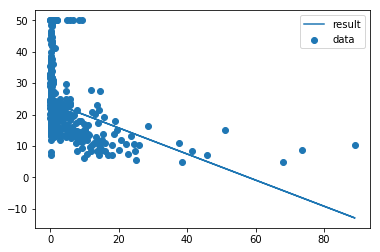

In [30]:
plt.scatter(crim, target, label = 'data')
plt.plot(crim, pred, label = 'result')
plt.legend()
plt.show()

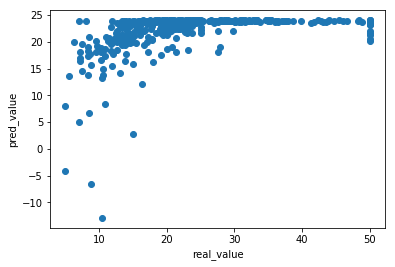

In [31]:
plt.scatter(target, pred)
plt.xlabel('real_value')
plt.ylabel('pred_value')
plt.show()

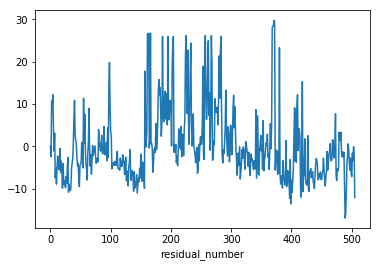

In [32]:
model.resid.plot()
plt.xlabel('residual_number')
plt.show()

In [33]:
sum(model.resid)

3.469224907348689e-12